<a href="https://colab.research.google.com/github/Nevermetyou65/PyTorch-Exercises/blob/main/linear_regression_with_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.nn import Linear # Linear  เป็น class

In [ ]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)

In [ ]:
def forward(x):
    y = w*x + b
    return y

In [ ]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [ ]:
# torch.manual_seed(1)

In [ ]:
model = Linear(in_features=1, out_features=1)
print(model.bias,"\n", model.weight)

Parameter containing:
tensor([0.6372], requires_grad=True) 
 Parameter containing:
tensor([[-0.8884]], requires_grad=True)


In [ ]:
x = torch.tensor([[2.0], [3.3]])
print(x.size())
print(model(x))

torch.Size([2, 1])
tensor([[-1.1396],
        [-2.2946]], grad_fn=<AddmmBackward>)


In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'X')

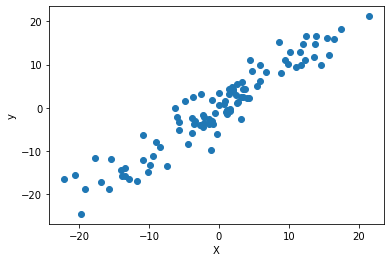

In [ ]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)

plt.plot(X, y, "o")
plt.ylabel("y")
plt.xlabel("X")

In [ ]:
class LR(nn.Module): # nn.Module เป็น base ของทุก class
    def __init__(self, input_size, output_size): 
        # input_size กับ output_size ประกาศให้สอดคล้องกับ Linear class
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred       

In [ ]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)
# print(list(model.parameters()))

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
w, b = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [ ]:
w1 = w[0][0].item() # item() to get python number
b1 = b[0].item()
print(w1, b1)

def get_params():
    return (w[0][0].item(), b[0].item())

0.5152631998062134 -0.44137823581695557


In [ ]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1

    plt.plot(x1, y1, "r")
    plt.scatter(X, y)
    plt.show()

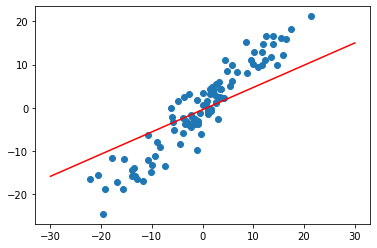

In [ ]:
plot_fit("Initial model")

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = list()
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss)

    # Training
    optimizer.zero_grad()
    loss.backward() # -> ได้ gradient ของ theta0  กับ theta1 มา
    optimizer.step() # -> update

epoch: 0 loss: 30.927865982055664
epoch: 1 loss: 21.896562576293945
epoch: 2 loss: 16.73989486694336
epoch: 3 loss: 13.793869972229004
epoch: 4 loss: 12.109169960021973
epoch: 5 loss: 11.144214630126953
epoch: 6 loss: 10.590022087097168
epoch: 7 loss: 10.270316123962402
epoch: 8 loss: 10.084524154663086
epoch: 9 loss: 9.975261688232422
epoch: 10 loss: 9.90979290008545
epoch: 11 loss: 9.869428634643555
epoch: 12 loss: 9.84350872039795
epoch: 13 loss: 9.82594108581543
epoch: 14 loss: 9.813250541687012
epoch: 15 loss: 9.803446769714355
epoch: 16 loss: 9.795392036437988
epoch: 17 loss: 9.788433074951172
epoch: 18 loss: 9.782190322875977
epoch: 19 loss: 9.776449203491211
epoch: 20 loss: 9.771078109741211
epoch: 21 loss: 9.76600170135498
epoch: 22 loss: 9.761173248291016
epoch: 23 loss: 9.756564140319824
epoch: 24 loss: 9.752150535583496
epoch: 25 loss: 9.747920989990234
epoch: 26 loss: 9.743863105773926
epoch: 27 loss: 9.739971160888672
epoch: 28 loss: 9.73623275756836
epoch: 29 loss: 9.732

Text(0.5, 0, 'epoch')

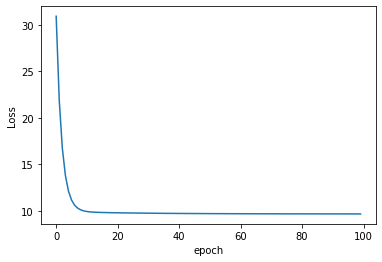

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

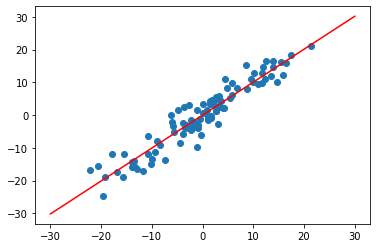

In [ ]:
plot_fit("Trained model")

In [ ]:
x = [1,2,3]
y = [4,5,6]

print(list(zip(x, y)))

[(1, 4), (2, 5), (3, 6)]


In [ ]:
for i, j in zip(x, y):
    print(i, j)

1 4
2 5
3 6
